In [1]:
# import pandas as pd
# # testing
# banana_df = pd.read_csv('data/banana_quality.csv')
# print(banana_df.head())
# banana_df_y = banana_df['Quality']
# banana_df_X = banana_df.drop('Quality', axis=1)
import qmlvcml
banana_df_X, banana_df_y = qmlvcml.read_banana_data()

/home/driffyn/anaconda3/envs/phys4684/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


Plotting the data


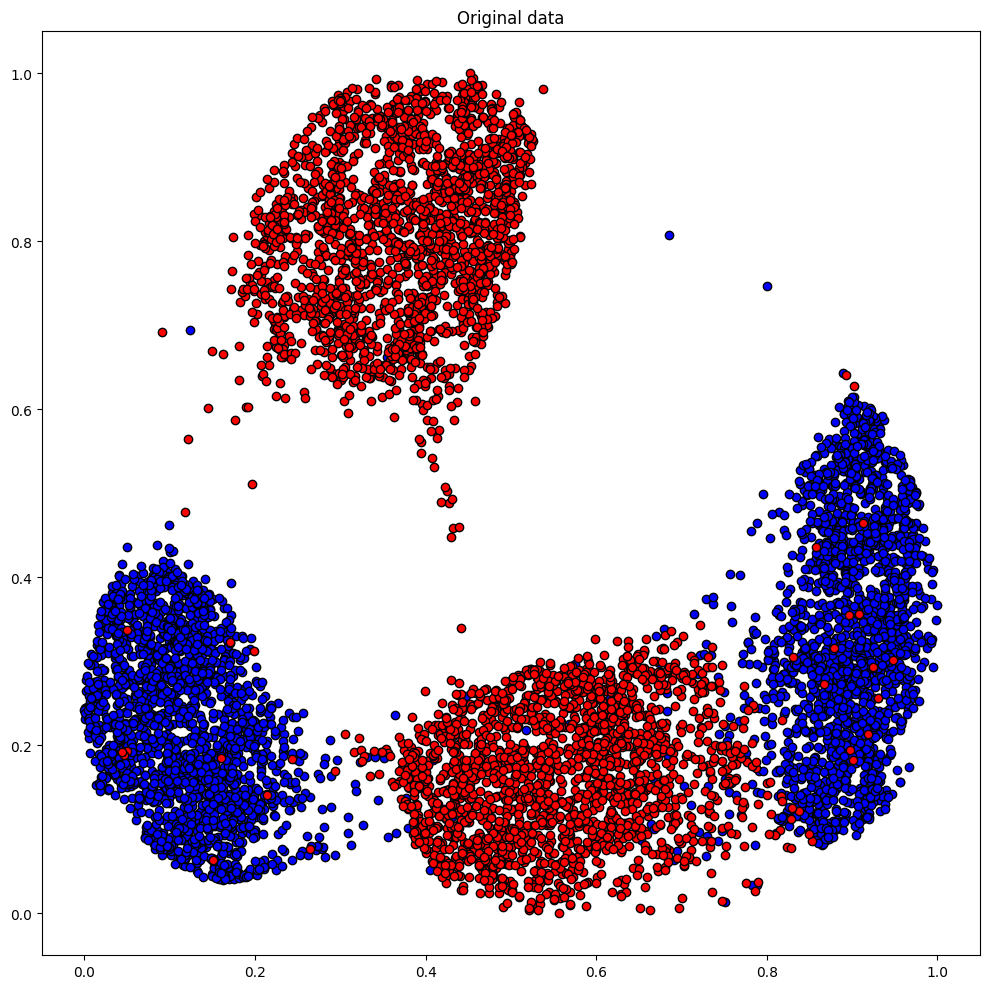

Plotting the padded and normalised data


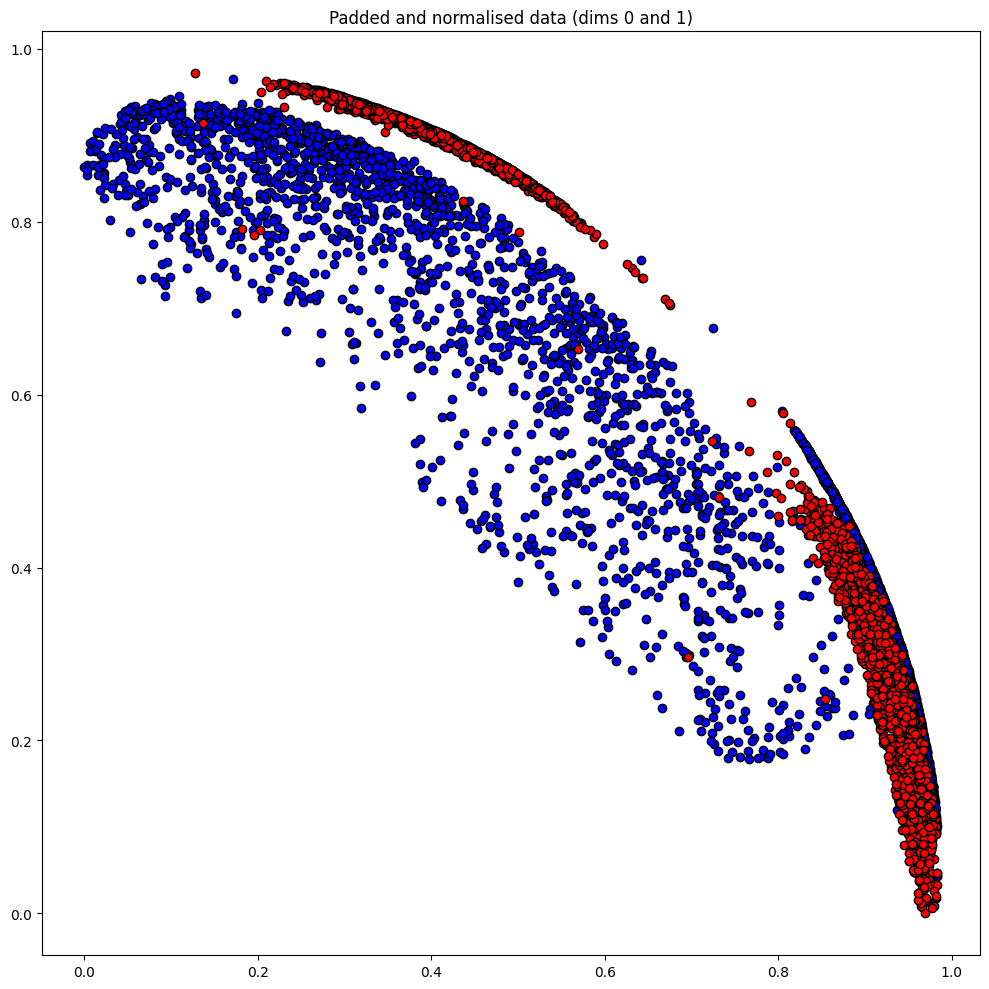

Plotting the feature vectors


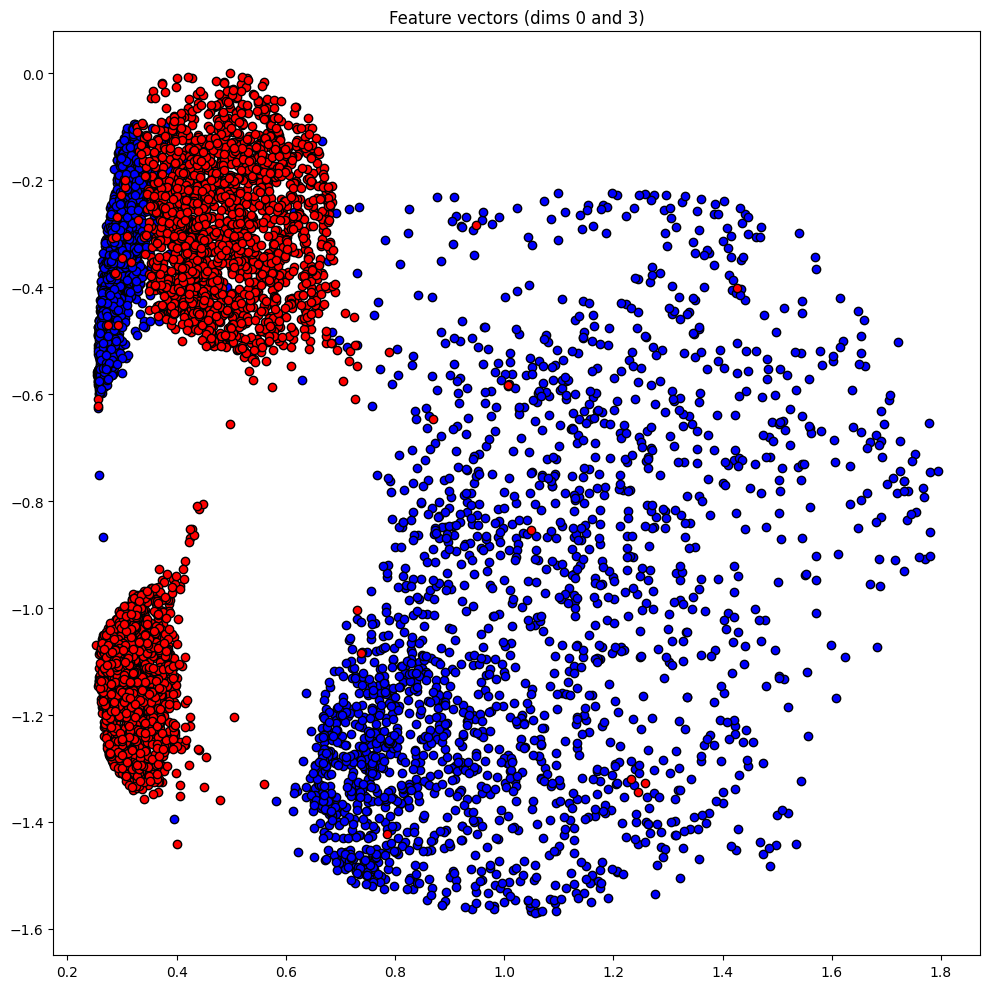

Best accuracy: 0.483125
Final weights: [[[-0.01946995  0.00199643 -0.02175835]
  [ 0.00472189  0.01358036 -0.01477659]]

 [[-0.0012531  -0.00800842 -0.00319018]
  [-0.02721207  0.0081993   0.00049938]]

 [[ 0.00534132 -0.00875331 -0.00909585]
  [-0.00452538 -0.00807189 -0.00643418]]

 [[-0.00619987 -0.00081441  0.00365634]
  [ 0.01854196 -0.00195423  0.0095157 ]]

 [[-0.00998393  0.00796943  0.0139721 ]
  [-0.00258413  0.00713858 -0.00157865]]]
Final bias: 0.0
Final predictions: [1. 1. 1. ... 1. 1. 1.]


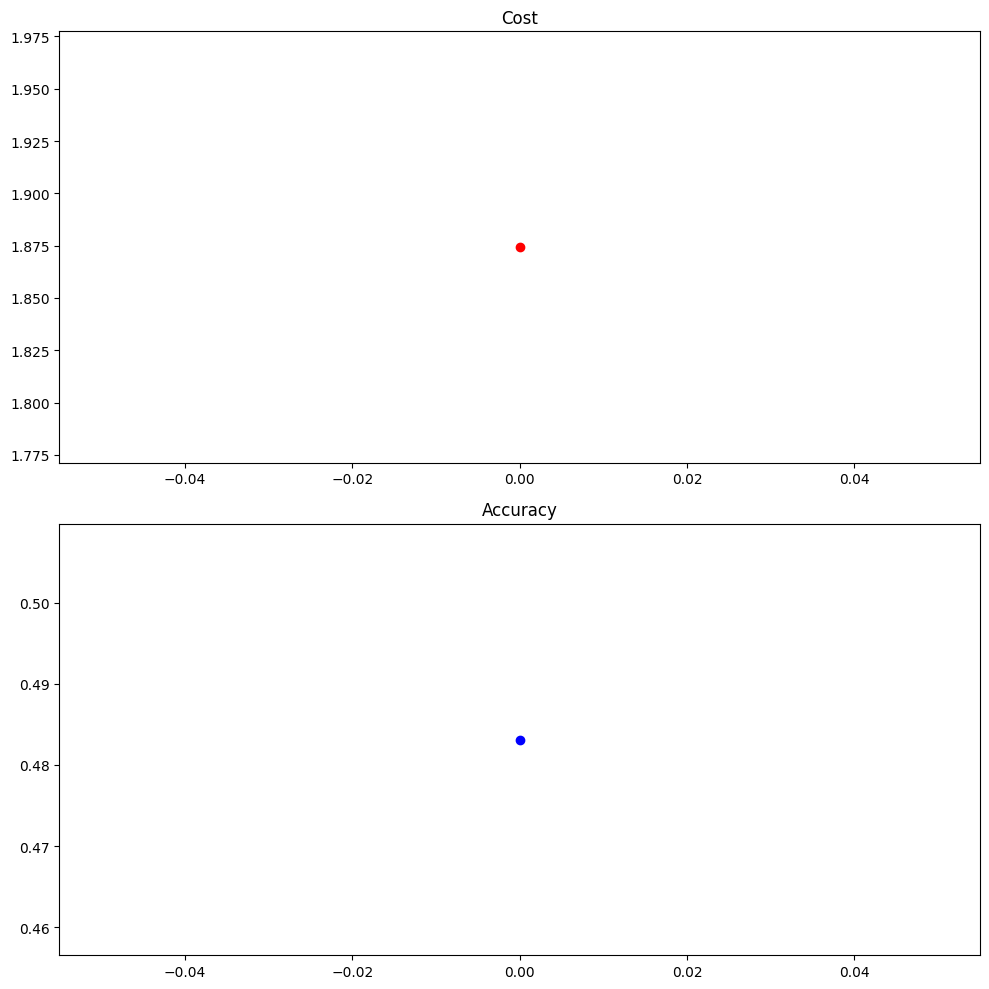

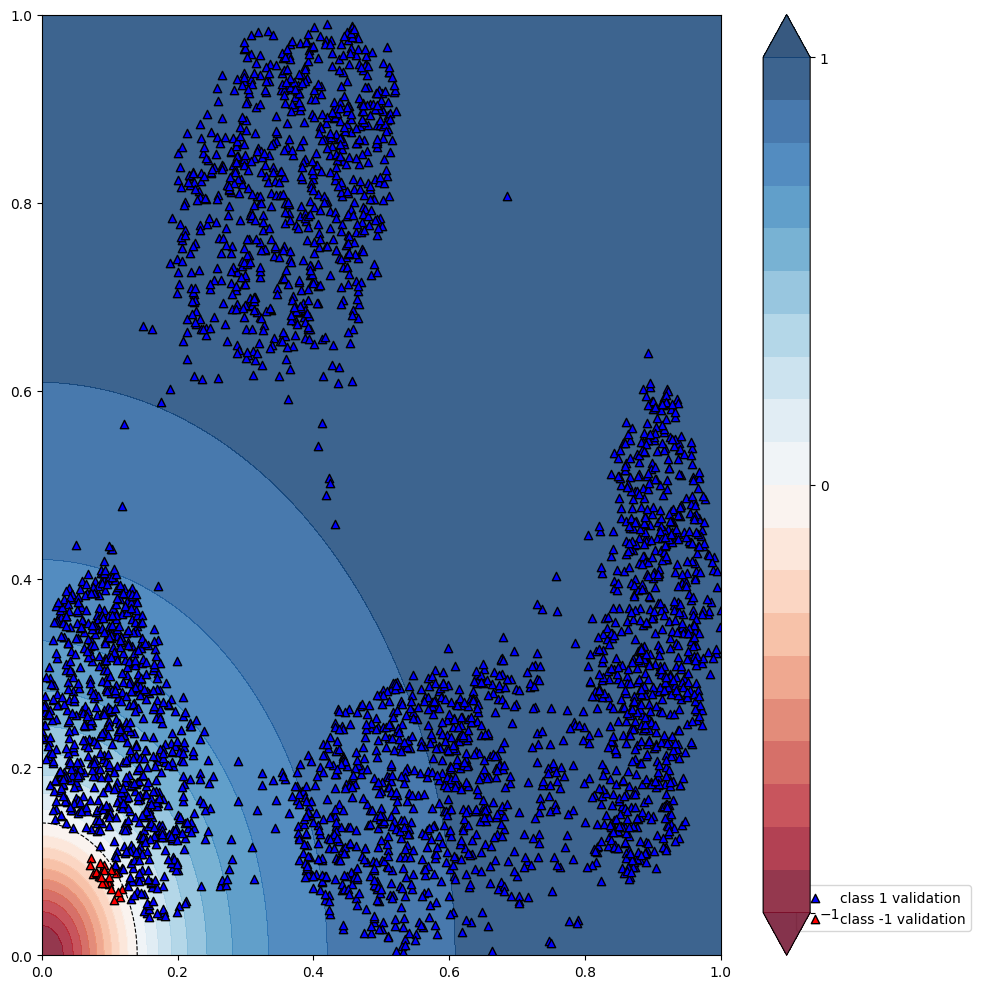

Plotting the confusion matrix


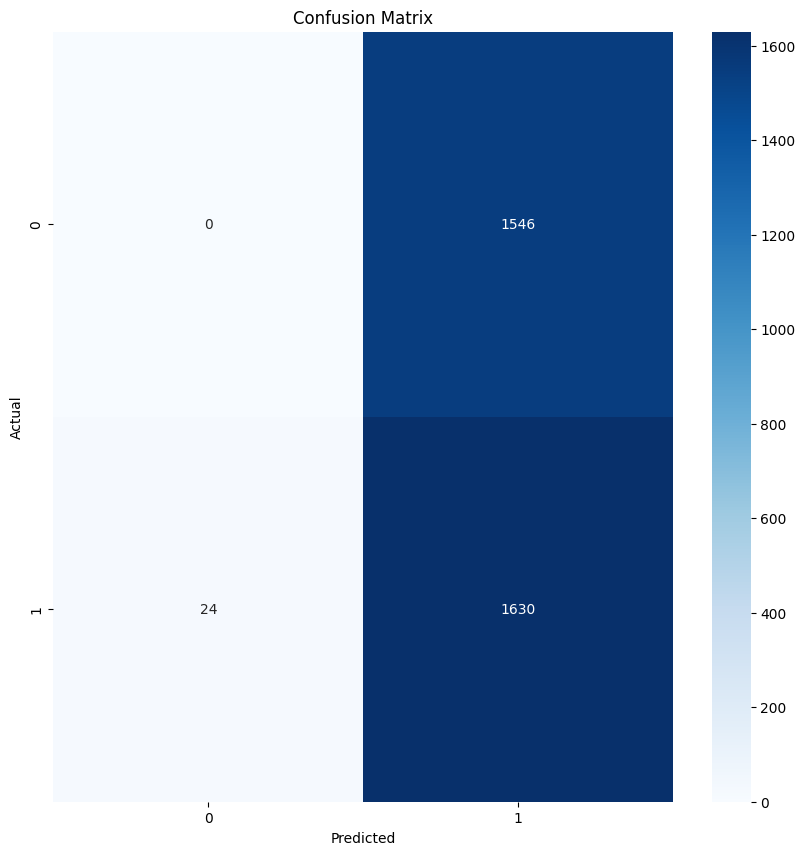

(tensor([[[-0.01946995,  0.00199643, -0.02175835],
          [ 0.00472189,  0.01358036, -0.01477659]],
 
         [[-0.0012531 , -0.00800842, -0.00319018],
          [-0.02721207,  0.0081993 ,  0.00049938]],
 
         [[ 0.00534132, -0.00875331, -0.00909585],
          [-0.00452538, -0.00807189, -0.00643418]],
 
         [[-0.00619987, -0.00081441,  0.00365634],
          [ 0.01854196, -0.00195423,  0.0095157 ]],
 
         [[-0.00998393,  0.00796943,  0.0139721 ],
          [-0.00258413,  0.00713858, -0.00157865]]], requires_grad=True),
 tensor(0., requires_grad=True),
 [tensor(1.87433184, requires_grad=True)],
 [0.483125])

In [2]:
qmlvcml.apply_model(banana_df_X, banana_df_y, steps=1,
                     batch_size_percent=.8, isPlot=True, isDebug=False,
                     dim_reduce_type='trimap')

In [ ]:
import pandas as pd
banana_df = pd.concat([banana_df_X, banana_df_y], axis=1)

In [ ]:
model, confusion = qmlvcml.apply_svm(banana_df, 'Quality', isPlot=True)